# This is practice in Sep 28
## Have a basic understanding of the pytorch
## Have fun!!!

In [1]:
from __future__ import print_function
import torch as t
t.__version__

'0.4.0'

In [5]:
x = t.Tensor(3, 5)

x = t.Tensor([[3,4], [1,2]])
x

tensor([[ 3.,  4.],
        [ 1.,  2.]])

In [7]:
x = t.rand(3, 5)
x

tensor([[ 0.4528,  0.5026,  0.2236,  0.8484,  0.8239],
        [ 0.1624,  0.2111,  0.8322,  0.1072,  0.6792],
        [ 0.9861,  0.3390,  0.8364,  0.9393,  0.8510]])

In [11]:
print(x.size())
x.size()[1], x.size(1)


torch.Size([3, 5])


(5, 5)

In [12]:
y = t.rand(3, 5)
x + y

tensor([[ 0.6318,  1.0375,  0.8776,  1.6178,  1.0081],
        [ 0.6439,  0.9269,  0.8736,  0.8764,  1.3565],
        [ 1.3551,  0.4920,  1.6350,  1.8095,  0.9310]])

In [14]:
t.add(x,y)

tensor([[ 0.6318,  1.0375,  0.8776,  1.6178,  1.0081],
        [ 0.6439,  0.9269,  0.8736,  0.8764,  1.3565],
        [ 1.3551,  0.4920,  1.6350,  1.8095,  0.9310]])

In [16]:
result = t.Tensor(3, 5)
t.add(x,y,out=result)
result


tensor([[ 0.6318,  1.0375,  0.8776,  1.6178,  1.0081],
        [ 0.6439,  0.9269,  0.8736,  0.8764,  1.3565],
        [ 1.3551,  0.4920,  1.6350,  1.8095,  0.9310]])

In [17]:
print('zuichu de y')
print(y)

print('first add style, y')
y.add(x)  # y not change
print(y)

print('second add style, y')
y.add_(x)  # y does changed
print(y)

zuichu de y
tensor([[ 0.1791,  0.5349,  0.6540,  0.7695,  0.1843],
        [ 0.4815,  0.7158,  0.0414,  0.7692,  0.6773],
        [ 0.3689,  0.1530,  0.7986,  0.8702,  0.0800]])
first add style, y
tensor([[ 0.1791,  0.5349,  0.6540,  0.7695,  0.1843],
        [ 0.4815,  0.7158,  0.0414,  0.7692,  0.6773],
        [ 0.3689,  0.1530,  0.7986,  0.8702,  0.0800]])
second add style, y
tensor([[ 0.6318,  1.0375,  0.8776,  1.6178,  1.0081],
        [ 0.6439,  0.9269,  0.8736,  0.8764,  1.3565],
        [ 1.3551,  0.4920,  1.6350,  1.8095,  0.9310]])


In [18]:
x[:,1] # second column

tensor([ 0.5026,  0.2111,  0.3390])

In [22]:
x[0,:] # first row

tensor([ 0.4528,  0.5026,  0.2236,  0.8484,  0.8239])

In [23]:
a = t.ones(5) # A Tensor all '1'
a

tensor([ 1.,  1.,  1.,  1.,  1.])

In [24]:
b = a.numpy() #Tensor ->numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [25]:
import numpy as np
a = np.ones(6)
b = t.from_numpy(a) #Numpy to Tensor
print(a)
print(b)

[1. 1. 1. 1. 1. 1.]
tensor([ 1.,  1.,  1.,  1.,  1.,  1.], dtype=torch.float64)


In [26]:
b.add_(2) # '_'in the end will change the value of it self
print(a)
print(b)


[3. 3. 3. 3. 3. 3.]
tensor([ 3.,  3.,  3.,  3.,  3.,  3.], dtype=torch.float64)


In [29]:
scalar = b[5] # get one value from the Tensor
scalar

tensor(3., dtype=torch.float64)

In [32]:
scalar.size()

torch.Size([])

In [33]:
scalar.item()

3.0

In [35]:
tensor = t.tensor([4])
tensor,scalar

(tensor([ 4]), tensor(3., dtype=torch.float64))

In [36]:
tensor.size(),scalar.size()

(torch.Size([1]), torch.Size([]))

In [37]:
tensor = t.tensor([13,24]) # 新建一个包含 3，4 两个元素的tensor

In [40]:
scalar = t.tensor(23)
scalar

tensor(23)

In [43]:
old_tensor = tensor
new_tensor = t.tensor(old_tensor)
new_tensor[1] = 1234
old_tensor, new_tensor

(tensor([ 13,  24]), tensor([   13,  1234]))

需要注意的是，t.tensor()总是会进行数据拷贝，
新tensor和原来的数据不再共享内存。
所以如果你想共享内存的话，
建议使用torch.from_numpy()或者tensor.detach()来新建一个tensor, 
二者共享内存。

In [44]:
new_tensor = old_tensor.detach()
new_tensor[0] = 1342
old_tensor, new_tensor

(tensor([ 1342,    24]), tensor([ 1342,    24]))

In [49]:
# 在不支持CUDA的机器下，下一步还是在CPU上运行
device = t.device("cuda:0" )#if t.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = x+y

RuntimeError: Error attempting to use dtype torch.float32 with layout torch.strided and device type CUDA.  Torch not compiled with CUDA enabled.


妈的这台电脑看来没有cuda

## autograd: 
深度学习的算法本质上是通过反向传播求导数，

而PyTorch的autograd模块则实现了此功能。在Tensor上的所有操作，
autograd都能为它们自动提供微分，避免了手动计算导数的复杂过程。

要想使得Tensor使用autograd功能，只需要设置tensor.requries_grad=True.


In [52]:
x = t.ones(3,4,requires_grad=True)


# 为tensor设置 requires_grad 标识，代表着需要求导数
# pytorch 会自动调用autograd 记录操作
# 上一步等价于
# x = t.ones(2,2)
# x.requires_grad = True


x

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [53]:
y = x.sum()
y

tensor(12.)

In [54]:
y.grad_fn

In [55]:
y.backward()# 反向传播,计算梯度

# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1

x.grad

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [56]:

y.backward()
x.grad

tensor([[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]])

In [57]:

y.backward()
x.grad

tensor([[ 3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.]])


y.backward()
x.grad
注意：grad在反向传播过程中是累加的(accumulated)，
这意味着每一次运行反向传播，
梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

In [60]:
x.grad.data.zero_()
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_


tensor([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]])

In [61]:
y.backward()
x.grad

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [62]:
y.backward()
x.grad

tensor([[ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.],
        [ 2.,  2.,  2.,  2.]])

### 祈祷自己今天能训练出一个最基础的图像识别的网络！
# Fighting William！！！

In [105]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): #这一句究竟什么意思❓❓❓
    #nn.Module是nn中最重要的类，看成一个网络的封装
    def __init__(self):
        
        super(Net, self).__init__()
        #上式等价于nn.Module.__init__(self)
        
        self.conv1 = nn.Conv2d(1,6,5)
        #卷积层‘1’表示输入图片为单通道，‘6’表示输出通道数，‘5’表示卷积核为5*5
        self.conv2 = nn.Conv2d(6,16,5)
        #卷积层
        
        self.fc1  = nn.Linear(16*5*5, 120)
        self.fc2  = nn.Linear(120, 84)
        self.fc3  = nn.Linear(84, 10)
    
    def forward(self, x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)),(2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        # reshape, '-1'表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#上述两个函数基本没看懂在做什么，基本的命令的内涵不理解
            
net = Net()
print(net)
        



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [106]:
params = list(net.parameters())
print(len(params))

10


In [107]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [108]:
input = t.randn(1,1,32,32)
out = net(input)
out.size()

torch.Size([1, 10])

In [109]:
net.zero_grad() #所以参数梯度清零
out.backward(t.ones(1,10)) #反向传播

In [110]:
output = net(input)
target = t.arange(0,10).view(1,10)
criterion = nn.MSELoss()
loss = criterion(output, target)
loss #loss是个标量

tensor(28.6587)

In [112]:
net.zero_grad()
print('反向前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向前 conv1.bias的梯度
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])
反向后 conv1.bias的梯度
tensor([-0.1275,  0.0656,  0.1265,  0.1498, -0.0178, -0.0609])


In [209]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率

optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()
    
loss

tensor(1.00000e-03 *
       2.8688)

In [210]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [212]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # 归一化
                             ])

# 训练集 /Users/admin/Downloads
trainset = tv.datasets.CIFAR10(
                    root='/Users/admin/Downloads/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/Users/admin/Downloads/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using downloaded and verified file: /Users/admin/Downloads/cifar-10-python.tar.gz
Files already downloaded and verified


ship


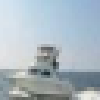

In [213]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

       ship        bird         cat        ship


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x1356de668>>
Traceback (most recent call last):
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


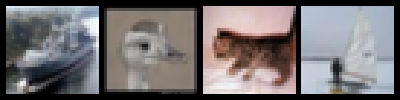

In [217]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [218]:

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [219]:

from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [244]:

t.set_num_threads(8)
for epoch in range(1):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward() 

        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.567
[1,  4000] loss: 0.629
[1,  6000] loss: 0.596
[1,  8000] loss: 0.621
[1, 10000] loss: 0.626
[1, 12000] loss: 0.650
Finished Training


实际的label:       cat     ship     ship    plane


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x121033e80>>
Traceback (most recent call last):
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 86, in rebuild_storage_filename
    storage = cls._new_shared_filename(manager, handle, size)
RuntimeError: Interrupted system call at /Users/soumith/minicondabuild3/conda-bld/pytorch_1524590658547/work/torch/lib/libshm/core.cpp:125


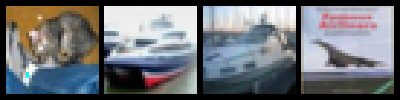

Process Process-29:
Process Process-30:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/Users/admin/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/Users/admin/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r 

In [232]:
dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [235]:
# 计算图片在每个类别上的分数
outputs = net(images)
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:    cat  ship  ship  bird


In [239]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 59 %
